In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

coil = pd.read_csv('dataset/coiltrain.txt', delimiter='\s+', encoding="utf-8")
coil.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [3]:
len(coil.columns)

86

In [4]:
# checking the percentage of missing values in each variable
coil.isnull().sum()/len(coil)*100

MOSTYPE     0.0
MAANTHUI    0.0
MGEMOMV     0.0
MGEMLEEF    0.0
MOSHOOFD    0.0
MGODRK      0.0
MGODPR      0.0
MGODOV      0.0
MGODGE      0.0
MRELGE      0.0
MRELSA      0.0
MRELOV      0.0
MFALLEEN    0.0
MFGEKIND    0.0
MFWEKIND    0.0
MOPLHOOG    0.0
MOPLMIDD    0.0
MOPLLAAG    0.0
MBERHOOG    0.0
MBERZELF    0.0
MBERBOER    0.0
MBERMIDD    0.0
MBERARBG    0.0
MBERARBO    0.0
MSKA        0.0
MSKB1       0.0
MSKB2       0.0
MSKC        0.0
MSKD        0.0
MHHUUR      0.0
           ... 
PGEZONG     0.0
PWAOREG     0.0
PBRAND      0.0
PZEILPL     0.0
PPLEZIER    0.0
PFIETS      0.0
PINBOED     0.0
PBYSTAND    0.0
AWAPART     0.0
AWABEDR     0.0
AWALAND     0.0
APERSAUT    0.0
ABESAUT     0.0
AMOTSCO     0.0
AVRAAUT     0.0
AAANHANG    0.0
ATRACTOR    0.0
AWERKT      0.0
ABROM       0.0
ALEVEN      0.0
APERSONG    0.0
AGEZONG     0.0
AWAOREG     0.0
ABRAND      0.0
AZEILPL     0.0
APLEZIER    0.0
AFIETS      0.0
AINBOED     0.0
ABYSTAND    0.0
CARAVAN     0.0
Length: 86, dtype: float

In [3]:
threshold = 0.7

# Dropping columns with missing value rate higher than threshold
coil = coil[coil.columns[coil.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
coil = coil.loc[coil.isnull().mean(axis=1) < threshold]

In [13]:
# coil.var()
# coil = coil[coil.columns[coil.var() < threshold]]
# coil[coil.columns[coil.var()]]

# variance of the CARAVAN attribute
coil["CARAVAN"].var()

0.05621008430190092

In [4]:
# Feature Matrix
X = coil.drop("CARAVAN",1) 
# Target Variable
y = coil["CARAVAN"]         
coil.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [5]:
# Religion

# MGODRK - Roman catholic
# MGODPR - Protestant ...
# MGODOV - Other religion
# MGODGE - No religion

# categorize based on religion
coil['RELIGIOUS'] = np.where((coil['MGODRK'] + coil['MGODPR']+ coil['MGODOV']) > coil['MGODGE'], 1, 0)
coil.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,RELIGIOUS
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,1
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,1
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,1
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,1
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,1


In [6]:
# Marriage

# 10 MRELGE   Married
# 11 MRELSA   Living together
# 12 MRELOV   Other relation
# 13 MFALLEEN Singles

# categorize based on marriage
coil['MARRIED'] = np.where((coil['MRELSA'] + coil['MRELOV']+ coil['MFALLEEN']) > coil['MRELGE'], 0, 1)
coil.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,RELIGIOUS,MARRIED
0,33,1,3,2,8,0,5,1,3,7,...,0,1,0,0,0,0,0,0,1,1
1,37,1,2,2,8,1,4,1,4,6,...,0,1,0,0,0,0,0,0,1,1
2,37,1,2,2,8,0,4,2,4,3,...,0,1,0,0,0,0,0,0,1,0
3,9,1,3,3,3,2,3,2,4,5,...,0,1,0,0,0,0,0,0,1,0
4,40,1,4,2,10,1,4,1,4,7,...,0,1,0,0,0,0,0,0,1,1


In [7]:
# Merge HOUSEHOLD_HAS_CHILDREN columns
# 1 - At least a child
# 0 - No child
coil['HOUSEHOLD_HAS_CHILDREN'] = np.where(
    (coil['MFGEKIND']) > coil['MFWEKIND'], 0, 1
)

In [8]:
# Function to pick maximum column value from each row in a dataframe
def merge_max(row_columns):
    a = []
    for row in row_columns:
        a.append(np.where(row == np.max(row))[0][0])
    return a

In [9]:
# Create 'EDUCATION_LEVEL' column with the dominant education level for the customer
# segment.
# 0 - High level education
# 1 - Medium level education
# 2 - Lower level education
education = coil.iloc[:,15:18].values
coil['EDUCATION_LEVEL'] = merge_max(education)

In [10]:
# Create 'OCCUPATION_LEVEL' column with the dominant education level for the customer
# segment.
# 0 - High status
# 1 - Entrepreneur
# 2 - Farmer
# 3 - Middle management
# 4 - Skilled labourers
# 5 - Unskilled labourers
occupation = coil.iloc[:,18:24].values
coil['OCCUPATION_LEVEL'] = merge_max(occupation)

In [11]:
# Create 'SOCIAL_CLASS' column with dominant social class for the customer
# segment.
# 0 - A
# 1 - B1
# 2 - B2
# 3 - C
# 4 - D
social_class = coil.iloc[:,24:29].values
coil['SOCIAL_CLASS'] = merge_max(social_class)

In [12]:
# Create 'HOUSE_OWNERSHIP' column with dominant house ownership for the customer
# segment.
# 0 - Rented House
# 1 - Home Owner
coil['HOUSE_OWNERSHIP'] = np.where(
    (coil['MHHUUR']) > coil['MHKOOP'], 0, 1
)

In [13]:
# Create 'NUMBER_OF_CARS' column with dominant number of cars for the customer
# segment.
# 0 - No Car
# 1 - One Car
# 2 - More than one Car
number_of_cars = pd.concat([coil.iloc[:,33],coil.iloc[:,31:33]],axis=1,join='inner')
coil['NUMBER_OF_CARS'] = merge_max(number_of_cars.values)

In [14]:
# Create 'INSURANCE_TYPE' column with dominant type of insurance for the customer
# segment.
# 0 - National Health Service
# 1 - Private Health Insurance
insurance_type = coil.iloc[:,34:36].values
coil['INSURANCE_TYPE'] = merge_max(insurance_type)

In [15]:
# Create 'INCOME' column with dominant income range for the customer
# segment.
# 0 - Income < 30.000
# 1 - Income 30-45.000
# 2 - Income 45-75.000
# 3 - Income 75-122.000
# 4 - Income >123.000
income = coil.iloc[:,36:41].values
coil['INCOME'] = merge_max(income)

In [16]:
# Create 'CONTRIBUTION_TYPE' column with dominant type of insurance contribution for the customer
# segment.
# 0 -  Contribution private third party insurance see L4
# 1 -  Contribution third party insurance (firms)
# 2 -  Contribution third party insurance (agriculture)
# 3 -  Contribution car policies
# 4 -  Contribution delivery van policies
# 5 -  Contribution motorcycle/scooter policies
# 6 -  Contribution lorry policies
# 7 -  Contribution trailer policies
# 8 -  Contribution tractor policies
# 9 -  Contribution agricultural machines policies
# 10 -  Contribution moped policies
# 11 -  Contribution life insurances
# 12 -  Contribution private accident insurance policies
# 13 -  Contribution family accidents insurance policies
# 14 -  Contribution disability insurance policies
# 15 - Contribution fire policies
# 16 -  Contribution surfboard policies
# 17-  Contribution boat policies
# 18 - Contribution bicycle policies
# 19 -  Contribution property insurance policies
# 20 -  Contribution social security insurance policies

contribution_type = coil.iloc[:,43:64].values
coil['CONTRIBUTION_TYPE'] = merge_max(contribution_type)

In [17]:
# Merge all dataframes to create the new dataset
cleaned_dataset = pd.concat([
    coil.iloc[:,0:5],
    coil.iloc[:,86:],
    coil.iloc[:,85]
],axis=1,join='inner')

In [18]:
# Matrix of features
X = cleaned_dataset.iloc[:,:-1].values
y = cleaned_dataset.iloc[:,-1].values

In [19]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [20]:
print(np.shape(X_train))
print(np.shape(X_test))

(4657, 16)
(1165, 16)


In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
# # Fit classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [44]:
# Predict
y_pred = classifier.predict(X_test)

In [47]:
# Confusion matrix evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1088,    0],
       [  77,    0]])

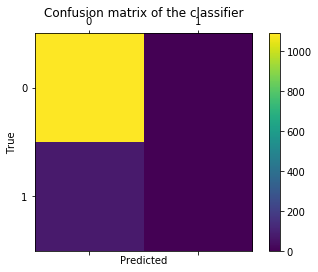

In [49]:
labels = ['business', 'health']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [48]:
accuracy = (cm[0][0]+cm[1][1])/np.sum(cm)
accuracy

0.9339055793991416

In [25]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies.mean()
accuracies.std()

0.011568728427785032

In [39]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix


clfs = {
    'knn':KNeighborsClassifier(3),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

f1_scores = dict()
for clf_name in clfs:
    print("="*30)
    print("")
    print(clf_name)
    print("")
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_test, y_pred)
    print("F-score: {:.4%}".format(f1_scores[clf_name]))
    
    cm = confusion_matrix(y_test,y_pred)
    accuracy = (cm[0][0]+cm[1][1])/np.sum(cm)
    print("Accuracy: {:.4%}".format(accuracy))
    
#f1_scores


knn

****Results****
F-score: 9.8039%
Accuracy: 92.1030%

gnb

****Results****
F-score: 15.4639%
Accuracy: 85.9227%

svm1

****Results****
F-score: 0.0000%
Accuracy: 93.3906%

svm2



/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


****Results****
F-score: 0.0000%
Accuracy: 93.3906%

svm3



/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


****Results****
F-score: 3.5088%
Accuracy: 90.5579%

mlp1



/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


****Results****
F-score: 0.0000%
Accuracy: 93.3906%

mlp2



/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


****Results****
F-score: 1.9231%
Accuracy: 91.2446%

ada

****Results****
F-score: 0.0000%
Accuracy: 93.3906%

dtc

****Results****
F-score: 5.2174%
Accuracy: 90.6438%

rfc

****Results****
F-score: 7.0175%
Accuracy: 90.9013%

gbc

****Results****
F-score: 0.0000%
Accuracy: 93.3047%

lr

****Results****
F-score: 0.0000%
Accuracy: 93.3906%


/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
